In [79]:
using JSON, Graphs, GraphPlot, ProgressMeter, Statistics, Plots, LaTeXStrings

include("./BDFS.jl")
using .BDFS

In [73]:
allGraphs = Dict{Int, Vector{SimpleGraph{Int64}}}()
@showprogress for n in 3:7
    gr_n = SimpleGraph{Int64}[]
    json_string = read("./AllGraphs/all_$n.json", String)
    graphs_n = [Vector{Vector{Int}}(a) for a in JSON.parse(json_string)]
    for graph in graphs_n
        for couple in graph
            couple .+= 1
        end
    end
    
    for gr in graphs_n
        g = SimpleGraph(n)
        for (a, b) in gr
            add_edge!(g, a, b)
        end
        push!(gr_n, g)
    end
    allGraphs[n] = gr_n
end
allGraphs

Progress: 100%|█████████████████████████████████████████| Time: 0:01:02


Dict{Int64, Vector{SimpleGraph{Int64}}} with 5 entries:
  5 => [SimpleGraph{Int64}(10, [[2, 3, 4, 5], [1, 3, 4, 5], [1, 2, 4, 5], [1, 2…
  4 => [SimpleGraph{Int64}(6, [[2, 3, 4], [1, 3, 4], [1, 2, 4], [1, 2, 3]]), Si…
  6 => [SimpleGraph{Int64}(15, [[2, 3, 4, 5, 6], [1, 3, 4, 5, 6], [1, 2, 4, 5, …
  7 => [SimpleGraph{Int64}(21, [[2, 3, 4, 5, 6, 7], [1, 3, 4, 5, 6, 7], [1, 2, …
  3 => [SimpleGraph{Int64}(3, [[2, 3], [1, 3], [1, 2]]), SimpleGraph{Int64}(2, …

# Первый ориентир
### "Трудоёмкость в среднем для нумерованных графов"

In [74]:
ψ_all = Dict()
@showprogress for n in 3:7
    ψ_all[n] = filter(isfinite, [BDFS.ψᵢ_sum_biDir_for_connected(g) for g in allGraphs[n]] ) |> mean
end
ψ_all

Progress: 100%|█████████████████████████████████████████| Time: 0:01:04


Dict{Any, Any} with 5 entries:
  5 => 1.011
  4 => 1.0
  6 => 1.03475
  7 => 1.06479
  3 => 1.0

### Классы изоморфных графов

In [75]:
isoGraphs = Dict{Int, Vector{SimpleGraph{Int64}}}()
@showprogress for n in 3:7
    gr_n = SimpleGraph{Int64}[]
    json_string = read("./AllGraphs/isomorphs_$n.json", String)
    graphs_n = [Vector{Vector{Int}}(a) for a in JSON.parse(json_string)]
    for graph in graphs_n
        for couple in graph
            couple .+= 1
        end
    end
    
    for gr in graphs_n
        g = SimpleGraph(n)
        for (a, b) in gr
            add_edge!(g, a, b)
        end
        push!(gr_n, g)
    end
    isoGraphs[n] = gr_n
end
isoGraphs

Dict{Int64, Vector{SimpleGraph{Int64}}} with 5 entries:
  5 => [SimpleGraph{Int64}(10, [[2, 3, 4, 5], [1, 3, 4, 5], [1, 2, 4, 5], [1, 2…
  4 => [SimpleGraph{Int64}(6, [[2, 3, 4], [1, 3, 4], [1, 2, 4], [1, 2, 3]]), Si…
  6 => [SimpleGraph{Int64}(15, [[2, 3, 4, 5, 6], [1, 3, 4, 5, 6], [1, 2, 4, 5, …
  7 => [SimpleGraph{Int64}(21, [[2, 3, 4, 5, 6, 7], [1, 3, 4, 5, 6, 7], [1, 2, …
  3 => [SimpleGraph{Int64}(3, [[2, 3], [1, 3], [1, 2]]), SimpleGraph{Int64}(2, …

In [76]:
ψ_iso = Dict()
@showprogress for n in 3:7
    ψ_iso[n] = filter(isfinite, [BDFS.ψᵢ_sum_biDir_for_connected(g) for g in isoGraphs[n]] ) |> mean
end
ψ_iso

Dict{Any, Any} with 5 entries:
  5 => 1.0167
  4 => 1.0
  6 => 1.03634
  7 => 1.06958
  3 => 1.0

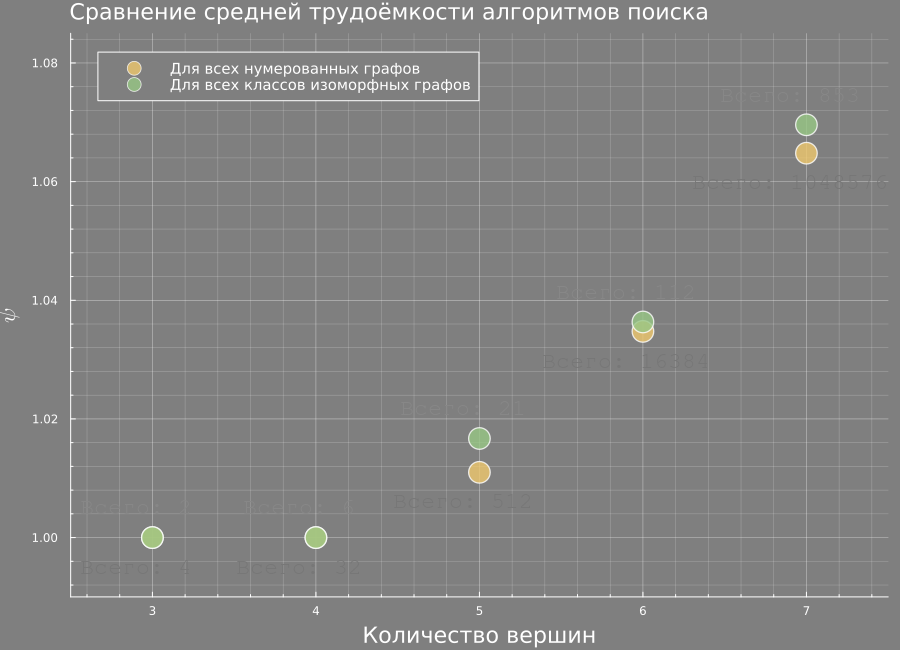

In [154]:
scatter(ψ_all,
    title = "Сравнение средней трудоёмкости алгоритмов поиска",    
    titlepos = :left,
    titlefontsize = 15,
    legend = :topleft,
    legendfontsize = 10,
    label = "Для всех нумерованных графов",
    size = (900, 650),
    
    xlims = (2.5,7.5),
    ylims = (0.99,1.085),
    
    xaxis = "Количество вершин",
    yaxis = L"\psi",
    markersize = 12,
    alpha = 0.8,
    minorgrid = true,
    minorgridalpha = 0.3,
    gridalpha = 0.6,
    linewidth = 12,
    palette = :Derain,
    background_color = :grey50,
    labelfontsize = 15,
)
annotate!([
    (n-0.1, ψ_all[n]-5e-3,
        ("Всего: $(length(allGraphs[n]))", 12, :center, "colibri", "#d8b971",))
    for n in 3:7
])


scatter!(ψ_iso,
    label = "Для всех классов изоморфных графов",
    markersize = 12,
    linewidth = 12,
    alpha = 0.8,
#     color = :green,
)
annotate!([
    (n-0.1, ψ_iso[n]+5e-3,
        ("Всего: $(length(isoGraphs[n]))", 12, :center, "colibri", "#91b782",))
    for n in 3:7
])

In [156]:
savefig("psi_all_isomorph_classes.svg");